<a href="https://colab.research.google.com/github/ShubhamSupare/Bike-sharing-demand-prediction/blob/main/Bike_Sharing_Demand_Prediction_Shubham_Supare_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

#**<font color='purple'> Loading Dataset and import libraries </font>**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Let's import data from drive and mount it
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv('/content/drive/MyDrive/SeoulBikeData.csv', encoding='latin')

In [4]:
# Let's check the first five rows of the data
df.head(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
# Let's check the last five rows of the data
df.tail(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [6]:
# Check the shape of the data, it will show the number of rows and columns available in the dataframe
df.shape

(8760, 14)

In [7]:
# Let's check the columns

df.columns

# Rename the columns

df=df.rename(columns={'Rented Bike Count':'Rented_Bike_Count',
                                'Temperature(°C)':'Temperature',
                                'Humidity(%)':'Humidity',
                                'Wind speed (m/s)':'Wind_speed',
                                'Visibility (10m)':'Visibility',
                                'Dew point temperature(°C)':'Dew_point_temperature',
                                'Solar Radiation (MJ/m2)':'Solar_Radiation',
                                'Rainfall(mm)':'Rainfall',
                                'Snowfall (cm)':'Snowfall',
                                'Functioning Day':'Functioning_Day'})

In [8]:
df.head()

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [9]:
# Let's check the details about the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   8760 non-null   object 
 1   Rented_Bike_Count      8760 non-null   int64  
 2   Hour                   8760 non-null   int64  
 3   Temperature            8760 non-null   float64
 4   Humidity               8760 non-null   int64  
 5   Wind_speed             8760 non-null   float64
 6   Visibility             8760 non-null   int64  
 7   Dew_point_temperature  8760 non-null   float64
 8   Solar_Radiation        8760 non-null   float64
 9   Rainfall               8760 non-null   float64
 10  Snowfall               8760 non-null   float64
 11  Seasons                8760 non-null   object 
 12  Holiday                8760 non-null   object 
 13  Functioning_Day        8760 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 958.2+ 

In [10]:
# let's check the unique values in the dataframe

df.nunique()

Date                      365
Rented_Bike_Count        2166
Hour                       24
Temperature               546
Humidity                   90
Wind_speed                 65
Visibility               1789
Dew_point_temperature     556
Solar_Radiation           345
Rainfall                   61
Snowfall                   51
Seasons                     4
Holiday                     2
Functioning_Day             2
dtype: int64

In [11]:
# Description of the data set
df.describe()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


From the above, we can see that the dataset has 8760 rows and no missing values. We will check the missing values later and see if the data contains any.

##**Features description**

**Date** : The date of the day, during 365 days from 01/12/2017 to 30/11/2018, formating in DD/MM/YYYY, type : str, we need to convert into datetime format.

**Rented Bike Count** : Number of rented bikes per hour which our dependent variable and we need to predict that, type : int

**Hour**: The hour of the day, starting from 0-23 it's in a digital time format, type : int, we need to convert it into category data type.

**Temperature(°C)**: Temperature in Celsius, type : Float

**Humidity(%)**: Humidity in the air in %, type : int

**Wind speed (m/s)** : Speed of the wind in m/s, type : Float

**Visibility (10m)**: Visibility in m, type : int

**Dew point temperature(°C)**: Temperature at the beggining of the day, type : Float

**Solar Radiation (MJ/m2)**: Sun contribution, type : Float

**Rainfall(mm)**: Amount of raining in mm, type : Float

**Snowfall (cm)**: Amount of snowing in cm, type : Float

**Seasons**: *Season of the year, type : str, there are only 4 season's in data *.

**Holiday**: If the day is holiday period or not, type: str

**Functioning Day**: If the day is a Functioning Day or not, type : str

##**Handle the missing and duplicate values**

In [12]:
# check the missing values in the data
df.isnull().sum()

Date                     0
Rented_Bike_Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind_speed               0
Visibility               0
Dew_point_temperature    0
Solar_Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning_Day          0
dtype: int64

We can see that the data is free from missing values

In [13]:
# Let's check the duplicate values
df.duplicated().sum()

0

The data does not have dupliate values

In [14]:
# Let's do the column wise anlysis
# we need date column in datetime format, let's try convert the datetime column and extract the year, month and day from the column

df['Date'] = df['Date'].apply(lambda x: dt.datetime.strptime(x,"%d/%m/%Y"))

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   8760 non-null   datetime64[ns]
 1   Rented_Bike_Count      8760 non-null   int64         
 2   Hour                   8760 non-null   int64         
 3   Temperature            8760 non-null   float64       
 4   Humidity               8760 non-null   int64         
 5   Wind_speed             8760 non-null   float64       
 6   Visibility             8760 non-null   int64         
 7   Dew_point_temperature  8760 non-null   float64       
 8   Solar_Radiation        8760 non-null   float64       
 9   Rainfall               8760 non-null   float64       
 10  Snowfall               8760 non-null   float64       
 11  Seasons                8760 non-null   object        
 12  Holiday                8760 non-null   object        
 13  Fun

In [16]:
# Let's extract the day, month and year from date column

df['Month']=df['Date'].dt.month
df['year']=df['Date'].dt.year
df['day']=df['Date'].dt.day_name()



In [17]:
# Now creat the column for weekday and weekend and convert that into numberical column for our analysis

df['weekdays/weekend']=df['day'].apply(lambda x: 1 if x=='Saturday' or x== 'Sunday' else 0)

df.head() #check the dataset

# Now, let's drop the day, Date and year column from the dataset

df = df.drop(columns=['year','Date','day'], axis=1)

1. We have converted the date column from 'str' to 'datetime" format
2. Then we split the 'Date' column into year, day, and month to get indepth details.
3. we have the one year data with us, so we drop year column, along with "Date' and 'day".
4. We have created the 'weekdays/weekend' from 'day' column.

In [18]:
df.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,Month,weekdays/weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rented_Bike_Count      8760 non-null   int64  
 1   Hour                   8760 non-null   int64  
 2   Temperature            8760 non-null   float64
 3   Humidity               8760 non-null   int64  
 4   Wind_speed             8760 non-null   float64
 5   Visibility             8760 non-null   int64  
 6   Dew_point_temperature  8760 non-null   float64
 7   Solar_Radiation        8760 non-null   float64
 8   Rainfall               8760 non-null   float64
 9   Snowfall               8760 non-null   float64
 10  Seasons                8760 non-null   object 
 11  Holiday                8760 non-null   object 
 12  Functioning_Day        8760 non-null   object 
 13  Month                  8760 non-null   int64  
 14  weekdays/weekend       8760 non-null   int64  
dtypes: f

In [20]:
# let's check the weekday/weekend column

df['weekdays/weekend'].value_counts()

0    6264
1    2496
Name: weekdays/weekend, dtype: int64

##**Change the Datetype**

We can see that the datatype of 'Hour', 'Month', 'weekdays/weekend' are 'int' and it should be in "catagorical" for our analysis.

In [21]:
#Change the int column into catagory column
cols=['Hour','Month','weekdays/weekend']
for col in cols:
  df[col]=df[col].astype('category')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Rented_Bike_Count      8760 non-null   int64   
 1   Hour                   8760 non-null   category
 2   Temperature            8760 non-null   float64 
 3   Humidity               8760 non-null   int64   
 4   Wind_speed             8760 non-null   float64 
 5   Visibility             8760 non-null   int64   
 6   Dew_point_temperature  8760 non-null   float64 
 7   Solar_Radiation        8760 non-null   float64 
 8   Rainfall               8760 non-null   float64 
 9   Snowfall               8760 non-null   float64 
 10  Seasons                8760 non-null   object  
 11  Holiday                8760 non-null   object  
 12  Functioning_Day        8760 non-null   object  
 13  Month                  8760 non-null   category
 14  weekdays/weekend       8760 non-null   c

#**Exploratory Data Analysis**

"Rented_Bike_count" is our dependant variable and we need to do analysis around this variable.First, we can go with Catagorical variable and then numerical.

**1. Month**

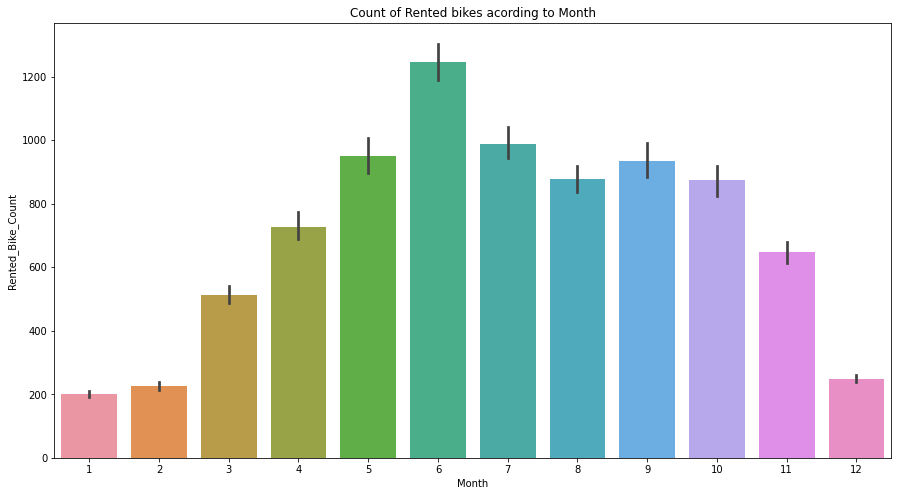

In [23]:
# Analyse months vs Rented Bike count
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=df,x='Month',y='Rented_Bike_Count')
ax.set(title='Count of Rented bikes acording to Month')
plt.show()

1. As we can see that the demand is more in the month if June. From the month 5 to 10, the demand is more than other months.

**2. Weekdays/Weekends**

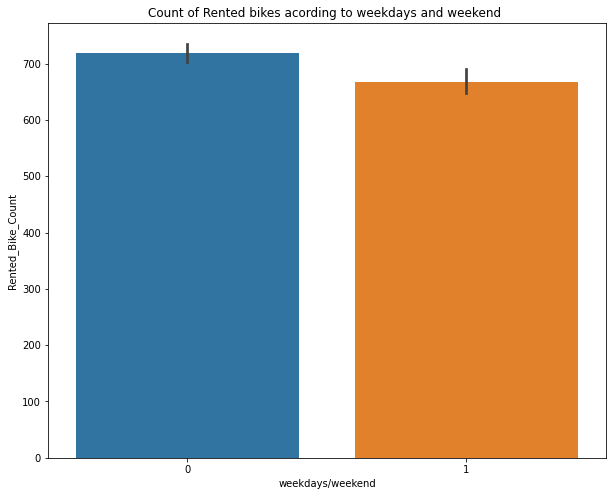

In [24]:
# Analyse weekdays/weekend Vs Rented_Bike_count
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=df,x='weekdays/weekend',y='Rented_Bike_Count')
ax.set(title='Count of Rented bikes acording to weekdays and weekend ')
plt.show()

From the above bar chart we can see that the demand of rented bike is more in weekdays than weekend

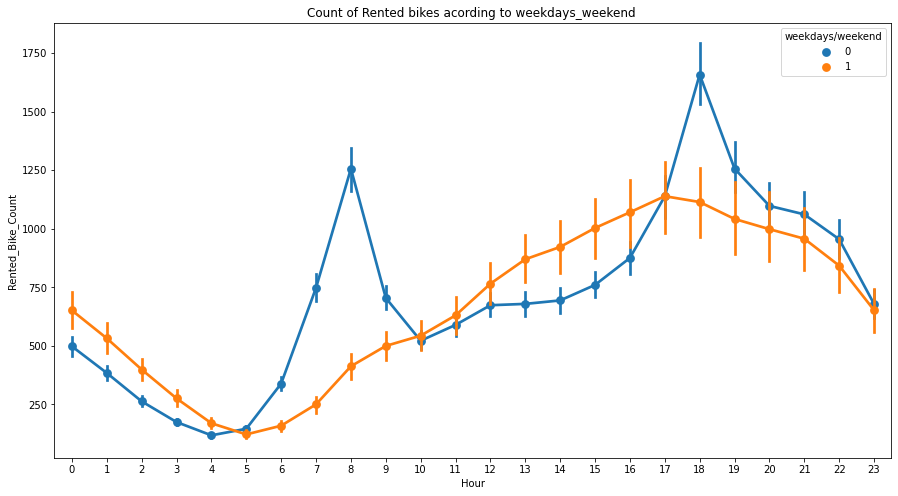

In [25]:
# Let's try to analyse this with line chart
fig,ax=plt.subplots(figsize=(15,8))
sns.pointplot(data=df,x='Hour',y='Rented_Bike_Count',hue='weekdays/weekend')
ax.set(title='Count of Rented bikes acording to weekdays_weekend ')
plt.show()

1. As per the above analysis, we can see that the demand for rented bikes is higher from 7 a.m. to 9 a.m. and 5 p.m. to 7 p.m. because of office hours.
2. For weekends, we can see that the demand is lower in the morning but it gradually increases in the evening. We can say that people love roaming around the city on the weekends in the evening.

**3. Hours**

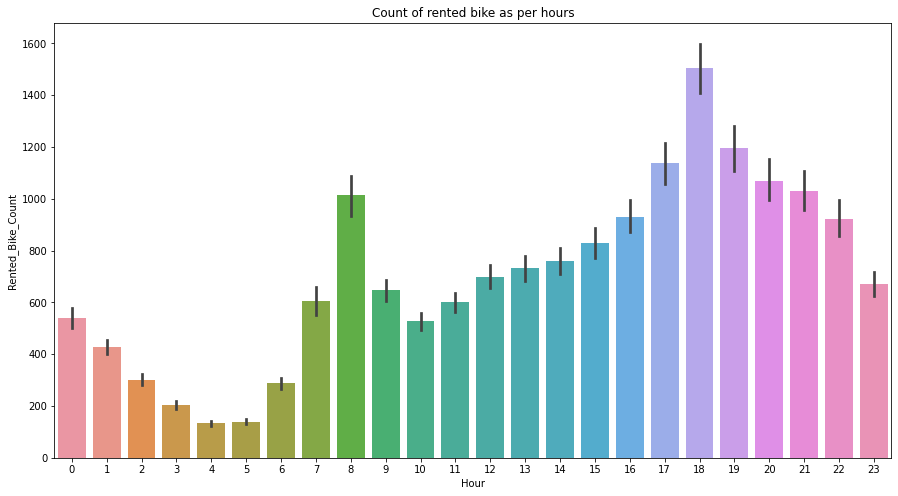

In [26]:
# Analyse hours Vs Rented_Bike_Count
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=df,x='Hour',y='Rented_Bike_Count')
ax.set(title='Count of rented bike as per hours')
plt.show()

The above bar plot shows the data according to hours for a year. It includes weekdays and weekends. From the above bar plot, we can say that the demand of rented bike is higher from 7 a.m. to 9 p.m.

**4.Functioning day**

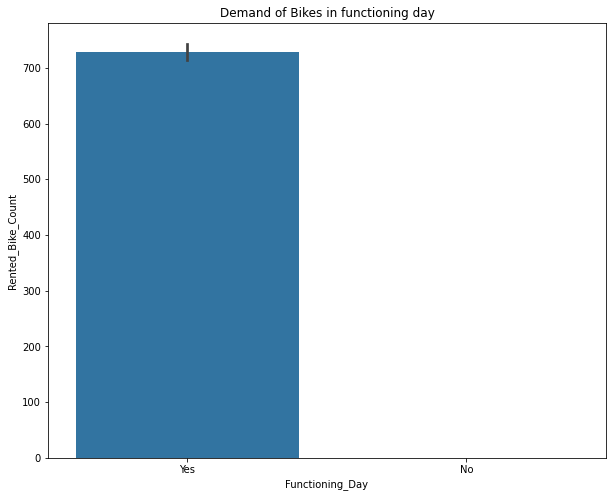

In [27]:
# Analyse the functining day vs Rented bike count

fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=df, x='Functioning_Day', y='Rented_Bike_Count')
ax.set(title='Demand of Bikes in functioning day')
plt.show()

From the above analysis, we can say the people don't use bike in no functioning day.

**5.Seasons**

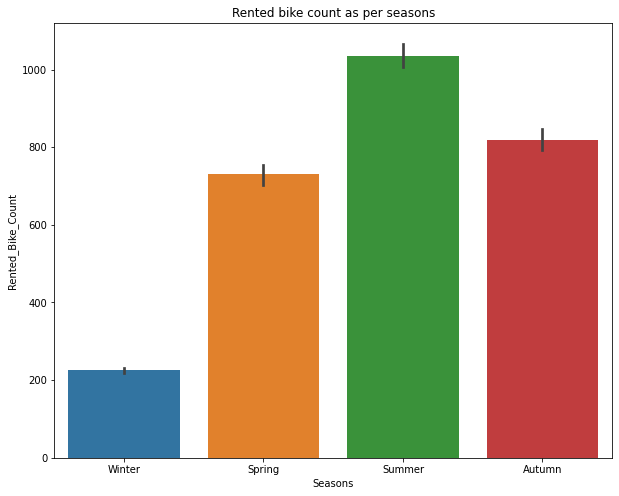

In [28]:
# Analyse the data as per seasons
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=df, x='Seasons', y='Rented_Bike_Count')
ax.set(title='Rented bike count as per seasons')
plt.show()

In the above bar plot, we can see that the demand of bikes are higher in Summer and lower in winter season.

**Holiday**

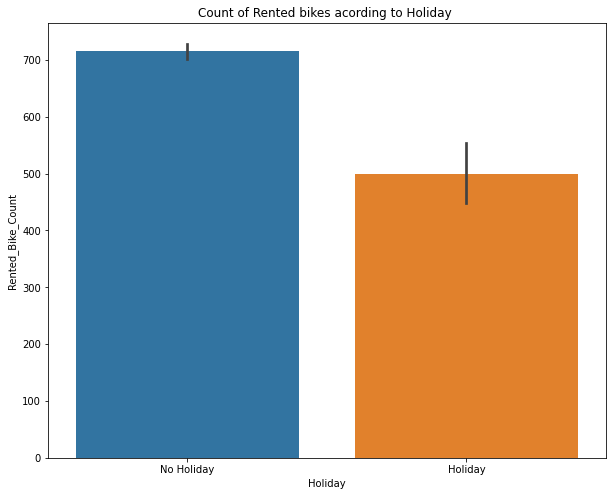

In [29]:
# Analyse the Holiday Vs Rented_Bike_count
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=df,x='Holiday',y='Rented_Bike_Count')
ax.set(title='Count of Rented bikes acording to Holiday ')
plt.show()

##**Select the Numeric columns from the dataset**

In [30]:
# Asign the Numeric columns to variable

numeric_feature=df.select_dtypes(include='number')
numeric_feature

,Rented_Bike_Count,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
8755,1003,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0
8756,764,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0
8757,694,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0
8758,712,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0


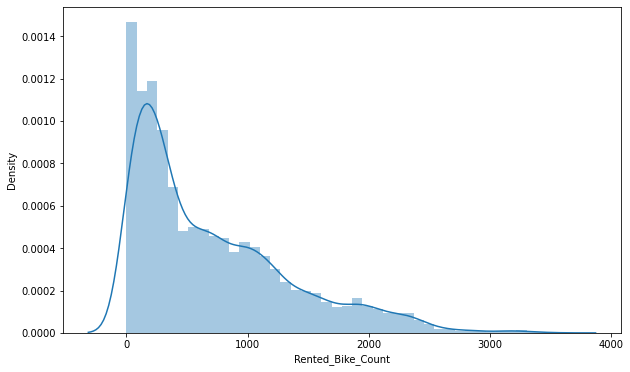

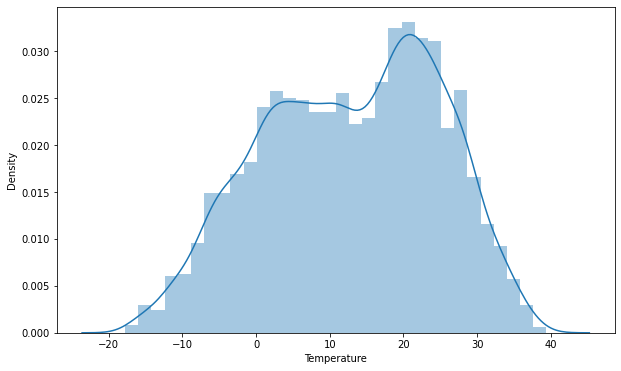

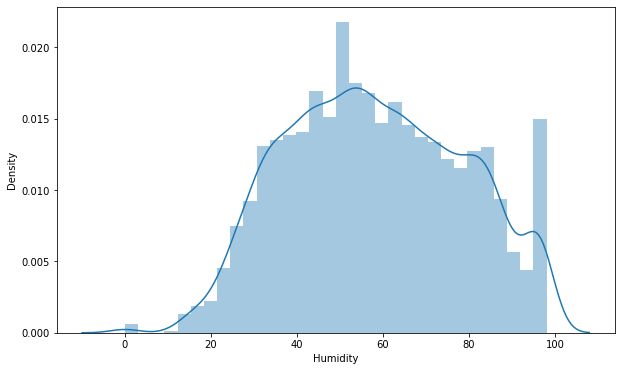

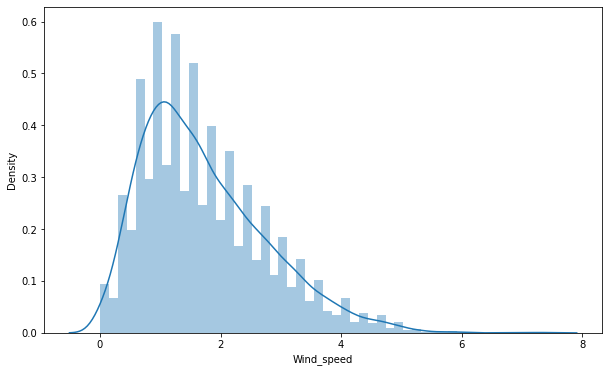

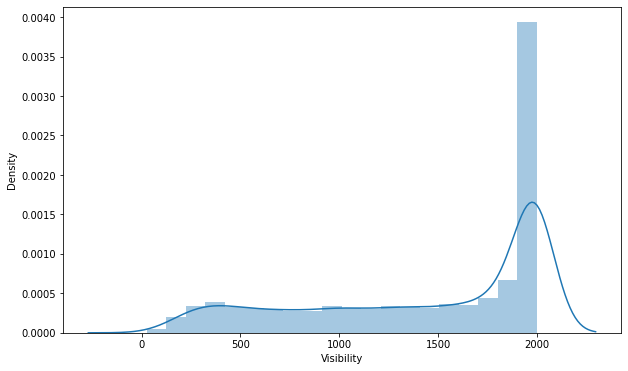

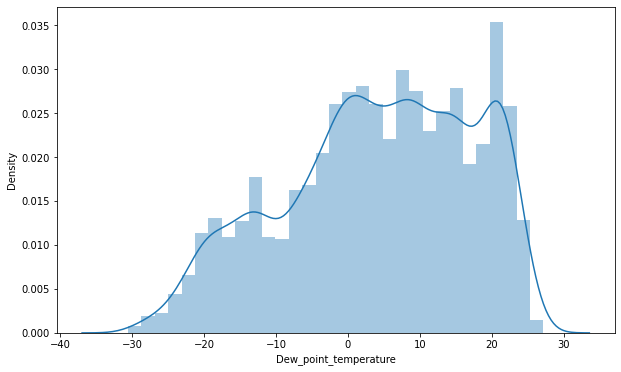

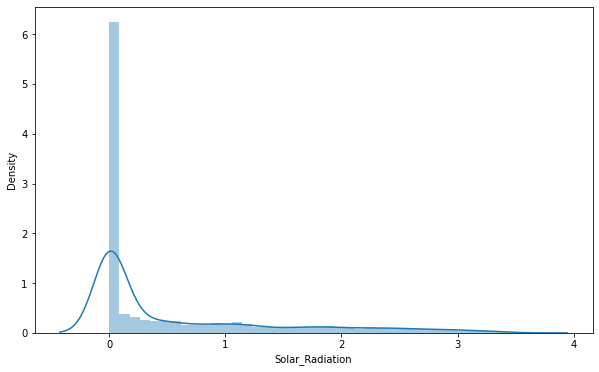

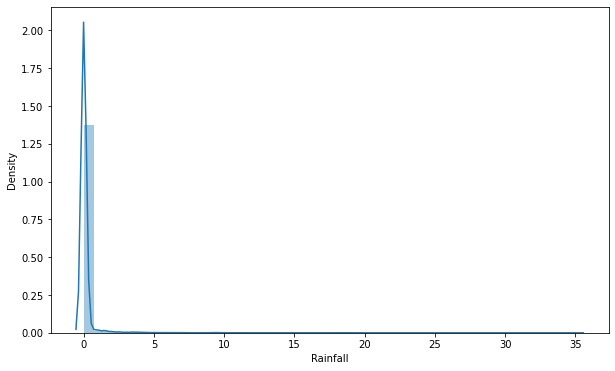

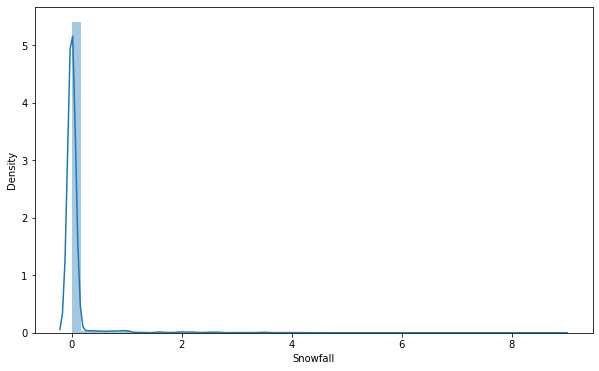

In [31]:
# print distplot to see the distribution
for col in numeric_feature:
  plt.figure(figsize=(10,6))
  sns.distplot(x=df[col])
  plt.xlabel(col)
plt.show()

['Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall', 'Snowfall']
['Temperature', 'Humidity', 'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall', 'Snowfall']


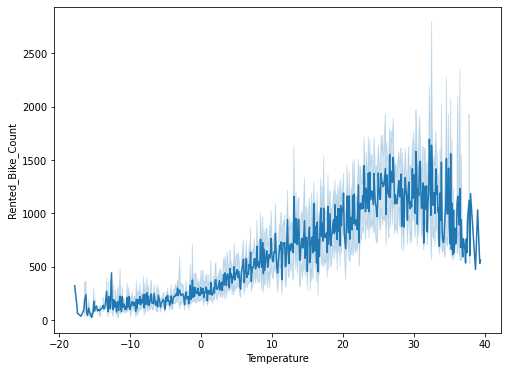

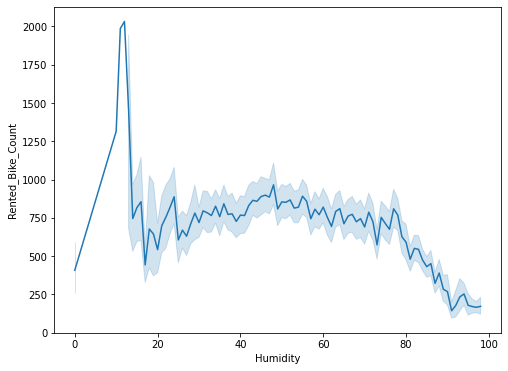

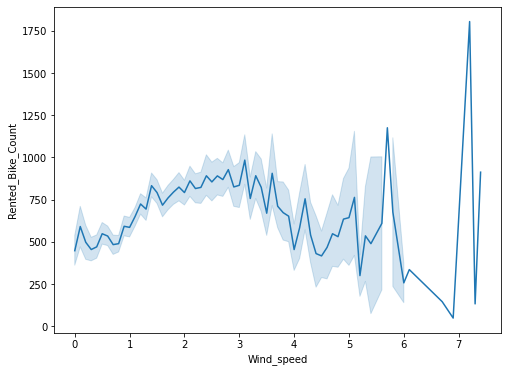

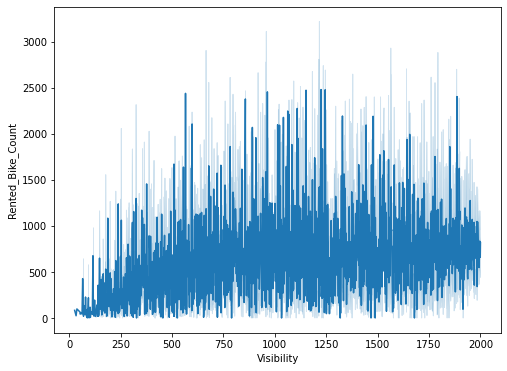

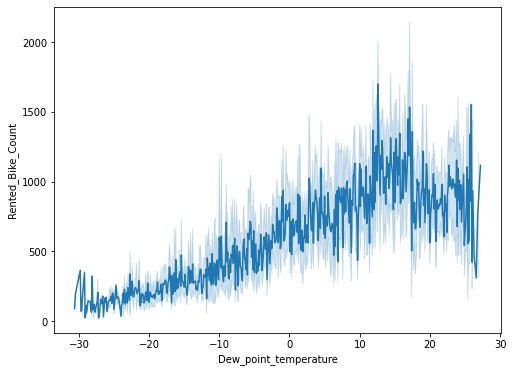

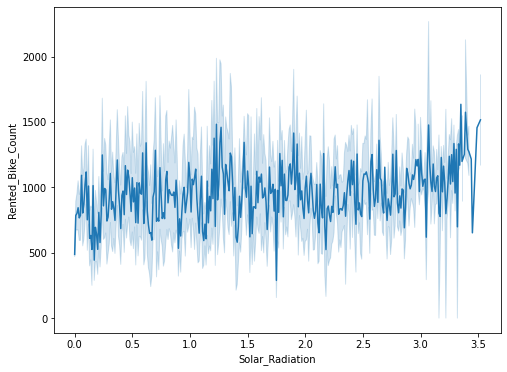

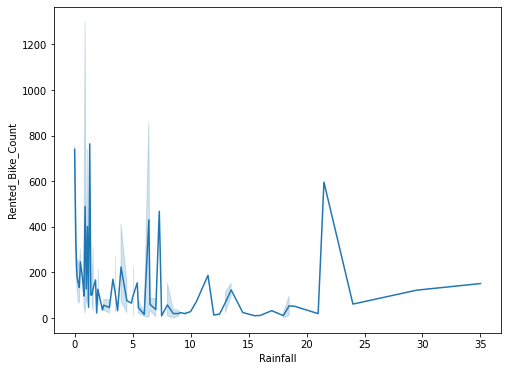

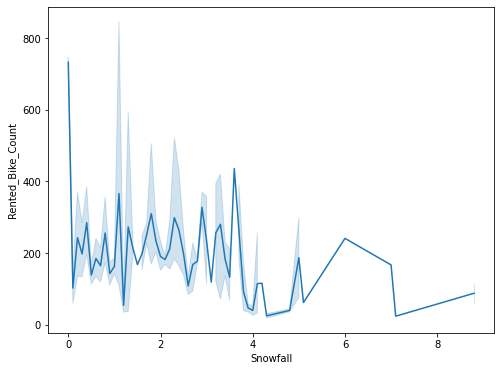

In [32]:
# Let's analyse one by one and see the relation with Rented_Bike_Count
numeric_feature=list(numeric_feature)
print(numeric_feature)
numeric_feature_extracted=numeric_feature[1:]
print(numeric_feature_extracted)

for col in numeric_feature_extracted:
  fig,ax=plt.subplots(figsize=(8,6))
  sns.lineplot(x=df[col],y=df['Rented_Bike_Count'])

**Here are the observation from the above graphs.**

1.People like to ride bikes when temperature is around 25°C in an average.
2."Dew_point_temperature' is almost same as the 'temperature' there is some similarity present.
3.The amount of rented bikes is huge, when there is solar radiation, the counts of rented bike is around 1000
4.The amount of rented bike is very low When we have more than 4 cm of snow, the bike rents is much lower
5.Even if it rains a lot the demand of of rent bikes is not decreasing, here for example even if we have 20 mm of rain there is a big peak of rented bikes.
6.The demand of rented bike is uniformly distribute despite of wind speed but when the speed of wind was 7 m/s then the demand of bike also increase that clearly means peoples love to ride bikes when its little windy.

##**Regression Plot**

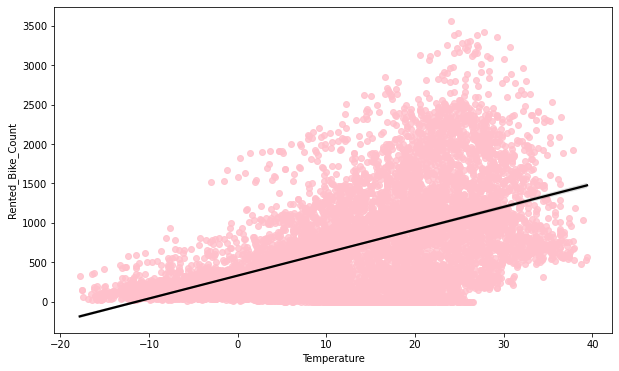

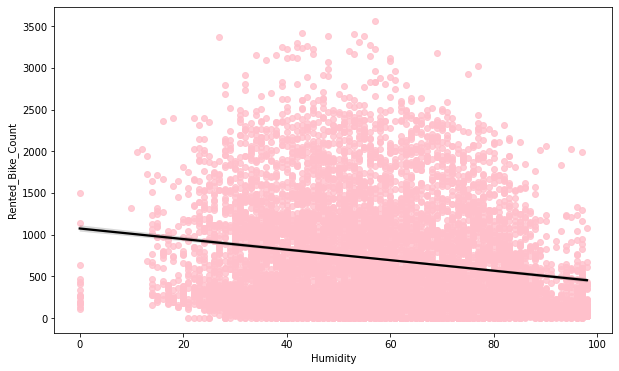

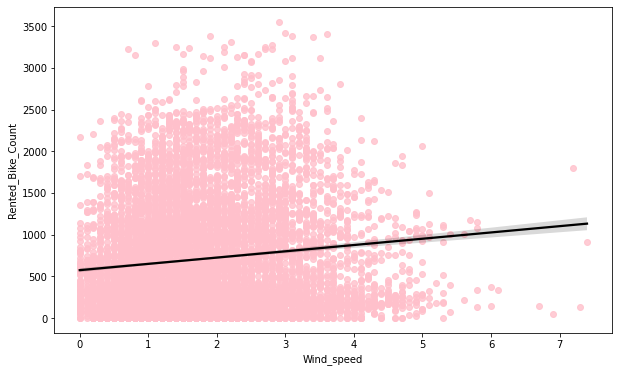

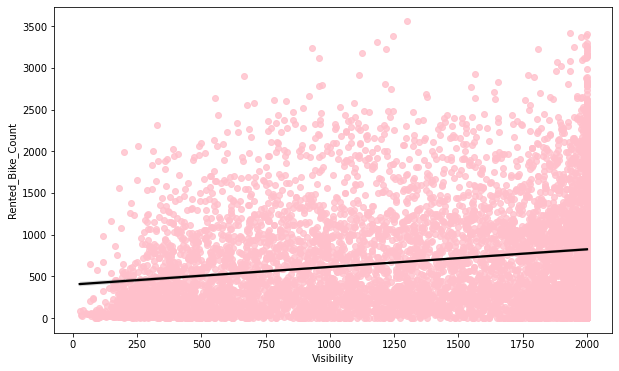

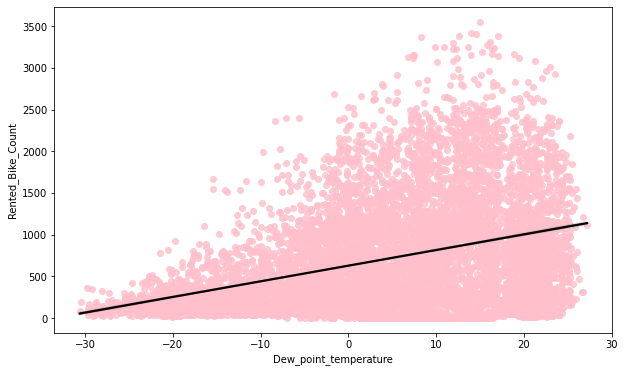

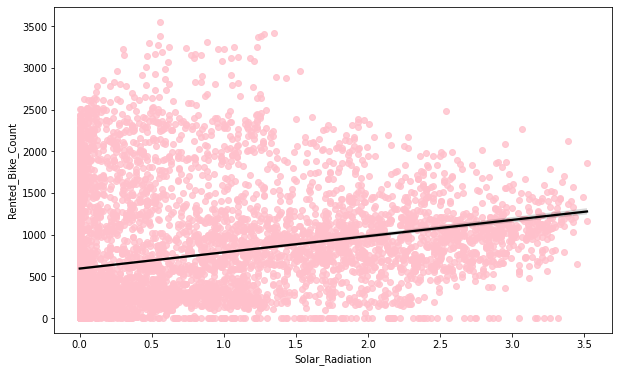

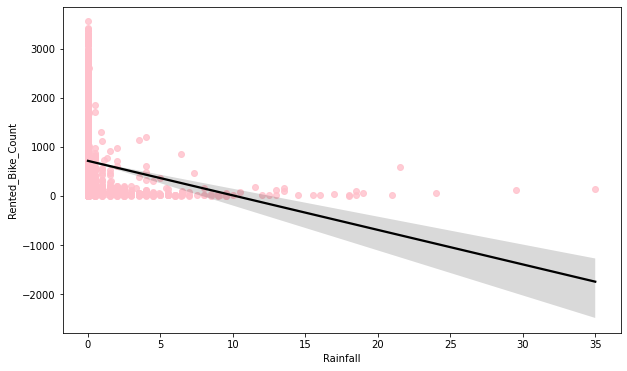

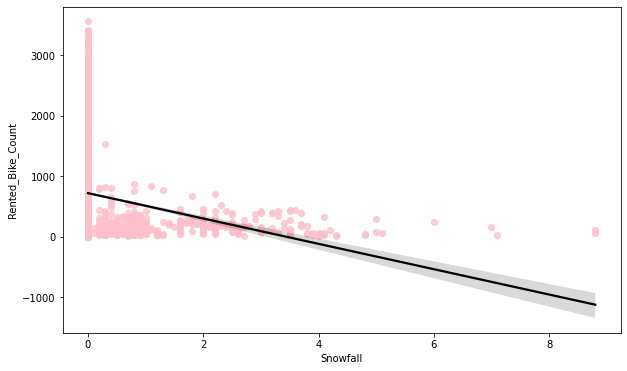

In [33]:
# Regression plot for numeric features
for col in numeric_feature_extracted:
  fig,ax=plt.subplots(figsize=(10,6))
  sns.regplot(x=df[col],y=df['Rented_Bike_Count'],scatter_kws={"color": 'pink'}, line_kws={"color": "black"})

1. From the above regression plot we can see that the Temperature','Wind_speed','Visibility', 'Dew_point_temperature', 'Solar_Radiation' are positively related to dependend variable.
2. Rainfall','Snowfall','Humidity' these features are negatively related with the target variaable which means the rented bike count decreases when these features increase.

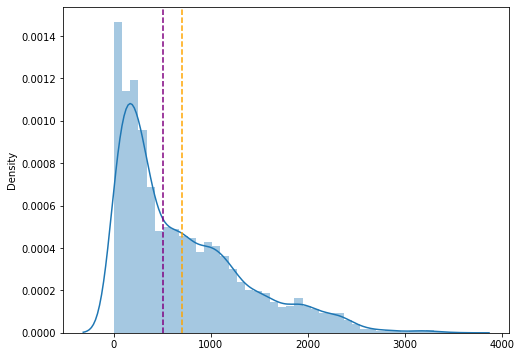

In [34]:
# Let's check the distribution of dependent variable(Rented_Bike_Count)

plt.figure(figsize=(8,6))
ax=sns.distplot(x=df['Rented_Bike_Count'])
ax.axvline(df['Rented_Bike_Count'].mean(), color='orange', linestyle='dashed' )
ax.axvline(df['Rented_Bike_Count'].median(),color='purple', linestyle='dashed' )

plt.show()

The above graph shows that Rented Bike Count has moderate right skewness. Since the assumption of linear regression is that 'the distribution of dependent variable has to be normal', so we should perform some operation to make it normal.



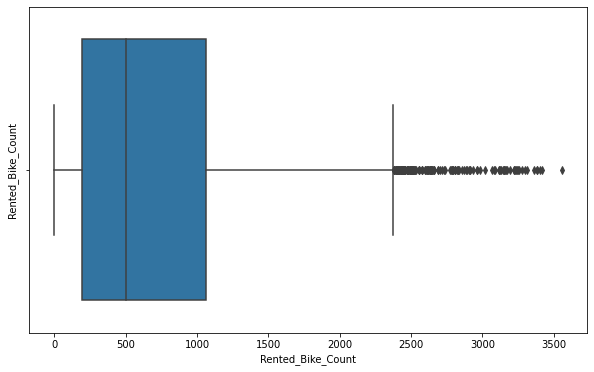

In [46]:
# Let's check ouliers for the dependant variable
plt.figure(figsize=(10,6))
plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=df['Rented_Bike_Count'])
plt.show()

The above box plot shows the outliers in Rented_Bike_Count column

Let's Normalise the Rented_Bike_Count column, we can use the square root method

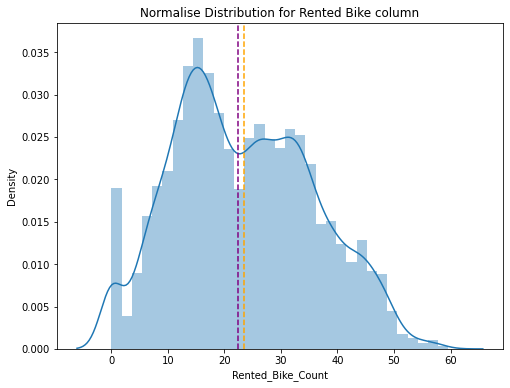

In [48]:
plt.figure(figsize=(8,6))
ax=sns.distplot(x=np.sqrt(df['Rented_Bike_Count']))
ax.axvline(np.sqrt(df['Rented_Bike_Count']).mean(), color='orange', linestyle='dashed')
ax.axvline(np.sqrt(df['Rented_Bike_Count']).median(),color='purple', linestyle='dashed')
plt.xlabel('Rented_Bike_Count')
plt.title('Normalise Distribution for Rented Bike column')
plt.show()

It is almost a Normal Distribution for Dependant column.

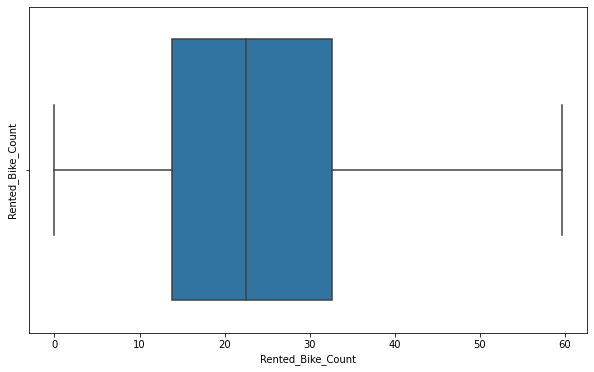

In [49]:
# Let's check the Outlier and see if we get rid of that ot not

plt.figure(figsize=(10,6))
plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=np.sqrt(df['Rented_Bike_Count']))
plt.show()

Now, there is no outlier in Dependant variable

In [52]:
df.corr()

,Rented_Bike_Count,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
Rented_Bike_Count,1.000000,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804
Temperature,0.538558,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity,-0.199780,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind_speed,0.121108,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility,0.199280,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew_point_temperature,0.379788,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar_Radiation,0.261837,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall,-0.123074,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall,-0.141804,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


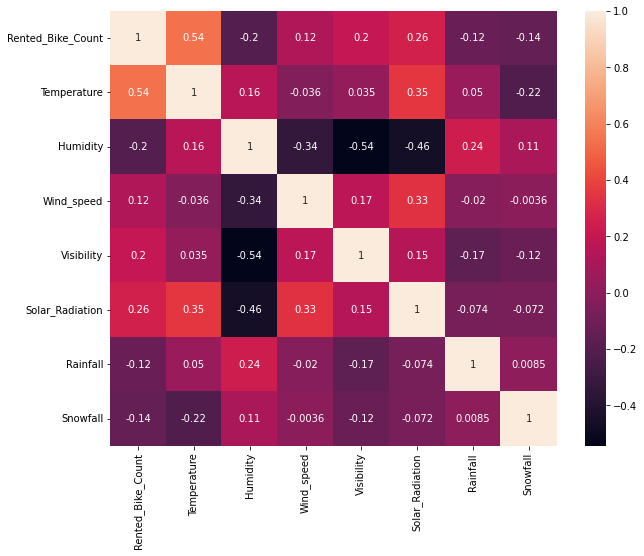

In [64]:
# Let's plot heatmap and see the correlation
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

From the above correlation heatmap, We see that there is a positive correlation between columns 'Temperature' and 'Dew point temperature' i.e 0.91 so even if we drop this column then it does not affects the outcome of our analysis. And they have the same variations.. so we can drop the column 'Dew point temperature(°C)'.

In [65]:
# drop the "Dew_point_temperature" column

df=df.drop(columns=['Dew_point_temperature'], axis=1)

KeyError: ignored

In [66]:
df.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,Month,weekdays/weekend
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0


## **Create Dummy Variable**

In [68]:
categorical_features=list(df.select_dtypes(['object','category']).columns)
categorical_features=pd.Index(categorical_features)
categorical_features

Index(['Hour', 'Seasons', 'Holiday', 'Functioning_Day', 'Month',
       'weekdays/weekend'],
      dtype='object')

In [71]:
# One Hot endcoding: it converts the catgorical variable to numbers which can be used in our analysis

#creat a copy
df_copy = df

def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

for col in categorical_features:
    df_copy = one_hot_encoding(df_copy, col)
df_copy.head()

,Rented_Bike_Count,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Hour_1,Hour_2,...,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,weekdays/weekend_1
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,173,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,107,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,78,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0


## **Model Training**

In [97]:
# Train Test Split for Regression
# Assign the value in x and y

x=df_copy.drop(columns=['Rented_Bike_Count'], axis=1)
y=np.sqrt(df_copy['Rented_Bike_Count'])

x.head()


,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Hour_1,Hour_2,Hour_3,...,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,weekdays/weekend_1
0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [98]:
y.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: Rented_Bike_Count, dtype: float64

In [99]:
# create test train spli
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.20, random_state=0)

print(x_train.shape)
print(x_test.shape)

(7008, 47)
(1752, 47)


## **Linear Regression**

In [100]:
# fit the linear regression model
reg=LinearRegression().fit(x_train, y_train)

# check the score

reg.score(x_train, y_train)

# check the coeficients
reg.coef_

array([ 5.13015001e-01, -1.22767765e-01, -4.13104408e-02,  1.11126717e-03,
        9.16726772e-01, -1.53255739e+00, -8.07221707e-02, -1.94872076e+00,
       -4.88230923e+00, -7.21855453e+00, -9.45851795e+00, -9.09121713e+00,
       -4.05091972e+00,  2.20684936e+00,  7.54238336e+00,  1.32579748e+00,
       -3.16495893e+00, -3.43098498e+00, -2.72035349e+00, -2.91898181e+00,
       -2.94597914e+00, -1.84312618e+00,  1.20075989e-01,  3.83601768e+00,
        1.03636667e+01,  6.80211377e+00,  6.02819351e+00,  6.32722687e+00,
        5.10060148e+00,  1.55360176e+00, -5.11903126e+09, -1.00675215e+10,
       -7.31652142e+09,  3.46321841e+00,  2.83463701e+01, -8.43493577e-01,
       -2.19749016e+09, -2.19749016e+09, -2.19749016e+09,  2.75100004e+09,
        2.75100003e+09,  2.75100003e+09, -7.31652142e+09, -7.31652141e+09,
       -7.31652142e+09,  2.05547236e+00, -1.44324639e+00])

In [101]:
# get y_train and y_test values

y_train_predict=reg.predict(x_train)

y_test_predict=reg.predict(x_test)

In [102]:
# Let's calculate Mterics for Linear Regression

#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error((y_train), (y_train_predict))
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_train, y_train_predict)
print("MAE :",MAE_lr)



#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score(y_train, y_train_predict)
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score(y_train, y_train_predict))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_train_predict))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )

MSE : 34.793980690219946
RMSE : 5.898642275152812
MAE : 4.459079727099164
R2 : 0.774552733127227
Adjusted R2 : 0.7683344106254546
